In [3]:
import pandas as pd
df=pd.read_csv('bollywood.csv')
df

,SlNo,ReleaseDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,TableNo.21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,AmitSahniKiList,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,RajdhaniExpress,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,BobbyJasoos,N,Comedy,18,10.80,3113427,4512,1224
...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,DumLagaKeHaisha,N,Comedy,15,30.00,3250917,8185,615
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513
146,147,20-Mar-15,DilliwaliZaalimGirlfriend,N,Comedy,32,12.00,2316047,4289,807
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762


In [3]:
list(df.columns)


['SlNo',
 'ReleaseDate',
 'MovieName',
 'ReleaseTime',
 'Genre',
 'Budget',
 'BoxOfficeCollection',
 'YoutubeViews',
 'YoutubeLikes',
 'YoutubeDislikes']

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 149 non-null    int64  
 1   ReleaseDate          149 non-null    object 
 2   MovieName            149 non-null    object 
 3   ReleaseTime          149 non-null    object 
 4   Genre                149 non-null    object 
 5   Budget               149 non-null    int64  
 6   BoxOfficeCollection  149 non-null    float64
 7   YoutubeViews         149 non-null    int64  
 8   YoutubeLikes         149 non-null    int64  
 9   YoutubeDislikes      149 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 11.8+ KB


In [8]:
df.Genre.value_counts()


Comedy      36
Drama       35
Thriller    29
Romance     25
Action      24
Name: Genre, dtype: int64

In [11]:
df.Genre.value_counts()[0:1]

Comedy    36
Name: Genre, dtype: int64

In [4]:
df['Genre'].sort_values(ascending=False)

73     Thriller
121    Thriller
51     Thriller
117    Thriller
94     Thriller
         ...   
119      Action
22       Action
61       Action
77       Action
148      Action
Name: Genre, Length: 149, dtype: object

In [11]:
pd.crosstab(df.Genre, df.ReleaseTime)


ReleaseTime,FS,HS,LW,N
Genre,,,,
Action,3,3,3,15
Comedy,3,5,5,23
Drama,4,6,1,24
Romance,3,3,4,15
Thriller,4,1,2,22


In [14]:
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])
df['Month'] = df['ReleaseDate'].dt.month
df.Month.value_counts()

1     20
3     19
5     18
7     16
2     16
4     11
9     10
6     10
11    10
10     9
8      8
12     2
Name: Month, dtype: int64

In [19]:
df[df.Budget>=25]['ReleaseDate'].dt.month.value_counts()

2     9
1     8
3     7
8     7
11    6
7     6
9     5
6     5
4     4
10    4
5     3
12    2
Name: ReleaseDate, dtype: int64

In [20]:
df['ROI'] = (df.BoxOfficeCollection - df.Budget)/df.Budget
df.sort_values(by='ROI',ascending = False).MovieName[0:10]

64                  Aashiqui2
89                         PK
132                GrandMasti
135               TheLunchbox
87                     Fukrey
58                    MaryKom
128                    Shahid
37     HumptySharmaKiDulhania
101          BhaagMilkhaBhaag
115            ChennaiExpress
Name: MovieName, dtype: object

In [23]:
df.groupby(by='ReleaseTime').ROI.mean()

ReleaseTime
FS    0.973853
HS    0.850867
LW    1.127205
N     0.657722
Name: ROI, dtype: float64

(array([64., 40., 19., 11.,  4.,  4.,  2.,  2.,  1.,  2.]),
 array([  2. ,  16.8,  31.6,  46.4,  61.2,  76. ,  90.8, 105.6, 120.4,
        135.2, 150. ]),
 <BarContainer object of 10 artists>)

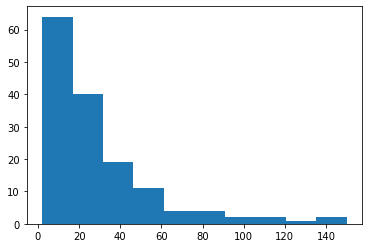

In [28]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.hist(df['Budget'])


In [29]:
corr = df[['BoxOfficeCollection', 'YoutubeLikes']].corr()
corr

,BoxOfficeCollection,YoutubeLikes
BoxOfficeCollection,1.000000,0.682517
YoutubeLikes,0.682517,1.000000


<AxesSubplot:xlabel='Genre', ylabel='YoutubeViews'>

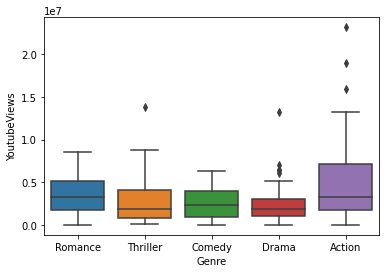

In [30]:
sn.boxplot(x='Genre', y='YoutubeViews', data=df)

<AxesSubplot:>

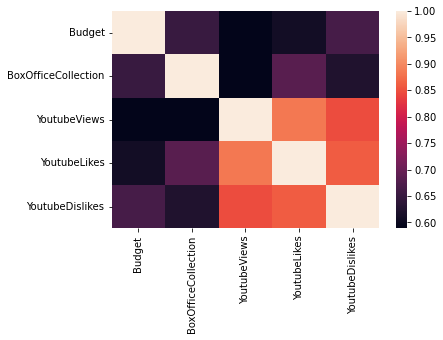

In [31]:
corr = df[['Budget', 'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes', 'YoutubeDislikes']].corr()
sn.heatmap(corr)